# 単回帰

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pystan
%matplotlib inline
%precision 4
plt.style.use('ggplot')

# データの作成

In [2]:
def make_dataset(n, minv, maxv):
    a = 5
    b = 3
    xs = (maxv - minv) * np.random.rand(n) + minv
    e = np.random.normal(loc=0, scale=2, size=n)
    return xs, a + b * xs + e

In [3]:
xs, ys = make_dataset(100, -2, 2)

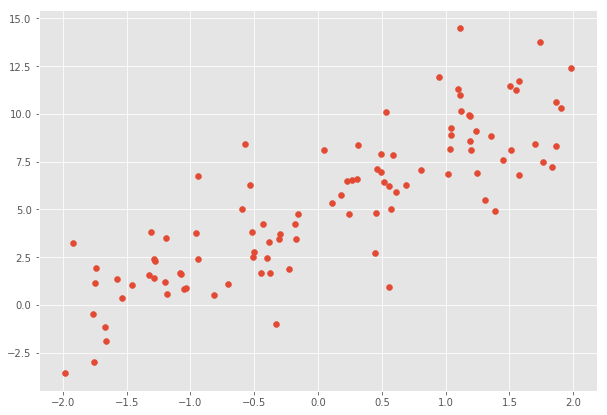

In [4]:
# 描画
plt.figure(figsize=(10, 7))
plt.scatter(xs, ys)
plt.show()

# モデルの記述

In [5]:
model_code = """
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
}
parameters { 
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model { 
  y ~ normal(alpha + beta * x, sigma);
}
"""

# モデルの構築

In [6]:
fit = pystan.stan(model_code=model_code, data=dict(y=ys, x=xs, N=len(xs)))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d5c9515652e6c049f3e6b6cc53cb45ed NOW.
/Users/kumada/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [7]:
fit
# ここに表示される全項目の詳細は？
# HMCって何？

Inference for Stan model: anon_model_d5c9515652e6c049f3e6b6cc53cb45ed.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   5.07  3.4e-3   0.22   4.66   4.93   5.07   5.22    5.5   4000    1.0
beta    2.89  3.2e-3    0.2   2.51   2.75   2.88   3.02   3.27   3752    1.0
sigma   2.15  2.4e-3   0.15   1.88   2.05   2.14   2.25   2.47   3909    1.0
lp__  -125.0    0.03   1.22 -128.3 -125.6 -124.7 -124.1 -123.6   2027    1.0

Samples were drawn using NUTS at Sun Apr 29 20:21:09 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

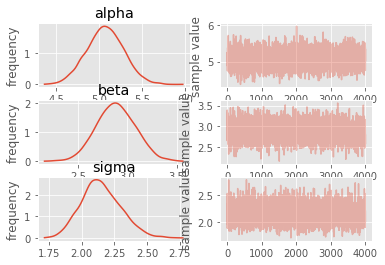

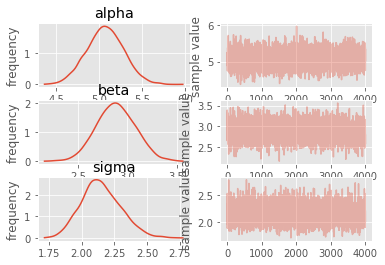

In [11]:
# もっとグラフを大きくしたい。
# なぜ２つ描画されるのか。
fit.plot()

# 計算結果

In [13]:
# 結果を取り出す。
# permutedって何？
results = fit.extract(permuted=True)
print(type(results))

<class 'collections.OrderedDict'>


In [17]:
# なぜ平均を取るのか？
# 直接取り出せないのか？
alpha = np.mean(results['alpha'])
print(alpha)

5.0729064448975585


In [18]:
beta = np.mean(results['beta'])
print(beta)

2.8856361912139805


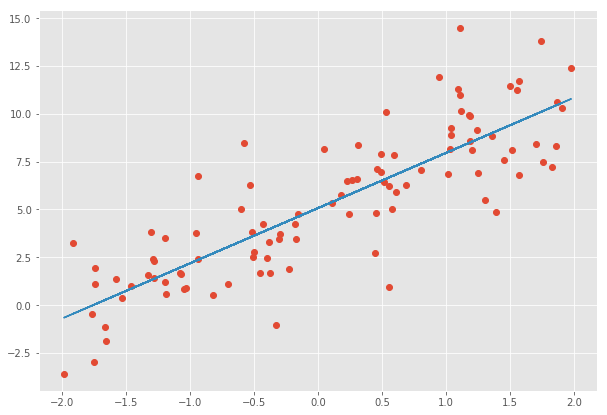

In [19]:
plt.figure(figsize=(10, 7))
plt.plot(xs, ys, 'o')
plt.plot(xs, alpha + beta * xs)
plt.show()